In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_auc_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('heart_2020_cleaned.csv').drop_duplicates().reset_index(drop=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
301713,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
301714,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
301715,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

no mv:)

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [5]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,274456,174312,280136,289653,257362,159671,31670,227724,251796,230412,104796,259066,289941,272425


([<matplotlib.patches.Wedge at 0x20b0a9ebdd0>,
 [Text(-1.0559821638774172, 0.3080611458343422, 'No'),
  Text(1.055982190808975, -0.30806105351744456, 'Yes')],
 [Text(-0.5759902712058639, 0.16803335227327754, '91.0%'),
  Text(0.5759902858958045, -0.1680333019186061, '9.0%')])

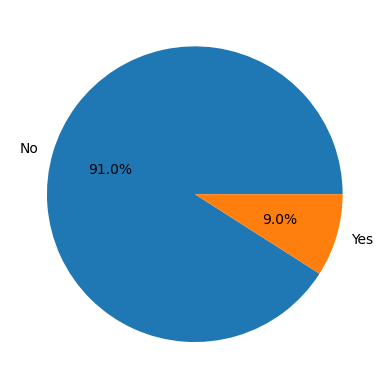

In [6]:
plt.pie(df.HeartDisease.value_counts(),labels=df.HeartDisease.value_counts().index,autopct='%1.1f%%')

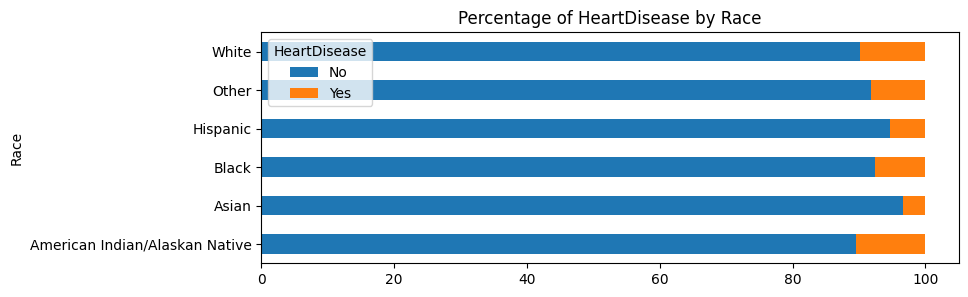

In [7]:
cross_tab = pd.crosstab(df['Race'], df['HeartDisease'], normalize='index') * 100  #هر ایندکس کراس تب 100 درصد 
cross_tab.plot(kind='barh', stacked=True,figsize=(9,3))
plt.title('Percentage of HeartDisease by Race')
plt.legend(title='HeartDisease')
plt.show()

In [8]:
df.Diabetic.value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

In [9]:
preg=df.Diabetic.str.contains('pregnancy')
df['preg']=preg.astype(int)
df['Diabetic']=np.where(df.Diabetic=='Yes (during pregnancy)','Yes',df.Diabetic)

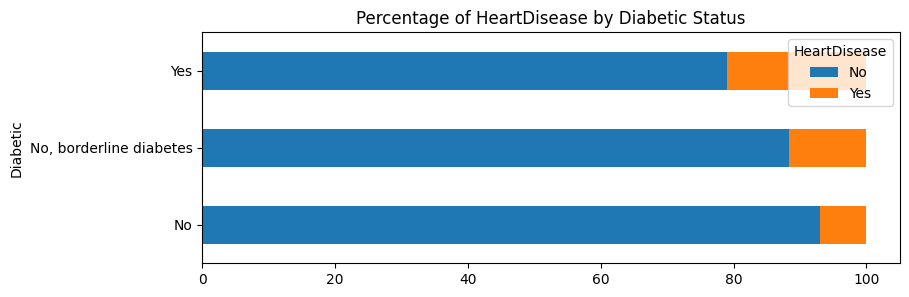

In [10]:
cross_tab = pd.crosstab(df['Diabetic'], df['HeartDisease'], normalize='index') * 100
cross_tab.plot(kind='barh', stacked=True,figsize=(9,3))
plt.title('Percentage of HeartDisease by Diabetic Status')
plt.legend(title='HeartDisease')
plt.show()

In [11]:
pd.crosstab(df.HeartDisease,df.AlcoholDrinking,normalize=True)

AlcoholDrinking,No,Yes
HeartDisease,,
No,0.841902,0.067746
Yes,0.086571,0.003782


In [12]:
pd.crosstab(df.Sex,df.preg,normalize=True)

preg,0,1
Sex,,
Female,0.520736,0.008472
Male,0.470792,0.000000


In [14]:
#handling categorical feautures
bin_dict={'No':0,'Yes':1}
reverse_bin_dict={v:k for k,v in bin_dict.items()}
features_to_encode=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                     'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for i in features_to_encode:
    df[i]=df[i].map(bin_dict)

diabetic_dict = {'Yes': 2,'No, borderline diabetes': 1,'No': 0}
reverse_diabetic_dict={v:k for k,v in diabetic_dict.items()}
df['Diabetic'] = df['Diabetic'].map(diabetic_dict)

sex_dict={'Male':0,'Female':1}
reverse_sex_dict={v:k for k,v in sex_dict.items()}
df['Sex'] = df['Sex'].map(sex_dict)

health_dict = {'Excellent': 4,'Very good': 3,'Good': 2,'Fair': 1,'Poor': 0}
reverse_health_dict={v:k for k,v in health_dict.items()}
df['GenHealth'] = df['GenHealth'].map(health_dict)

race_dict = {'Other':5,'Hispanic': 4,'American Indian/Alaskan Native': 3,'Asian': 2,'Black': 1,'White': 0}
reverse_race_dict={v:k for k,v in race_dict.items()}
df['Race'] = df['Race'].map(race_dict)

age_dict = {
    '18-24': 21, #midpoint
    '25-29': 27, 
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 85
}
reverse_age_dict={v:k for k,v in age_dict.items()}
df['AgeCategory'] = df['AgeCategory'].map(age_dict)

In [15]:
df.preg=np.where(df.Sex==0,-1,df.preg)

<Axes: >

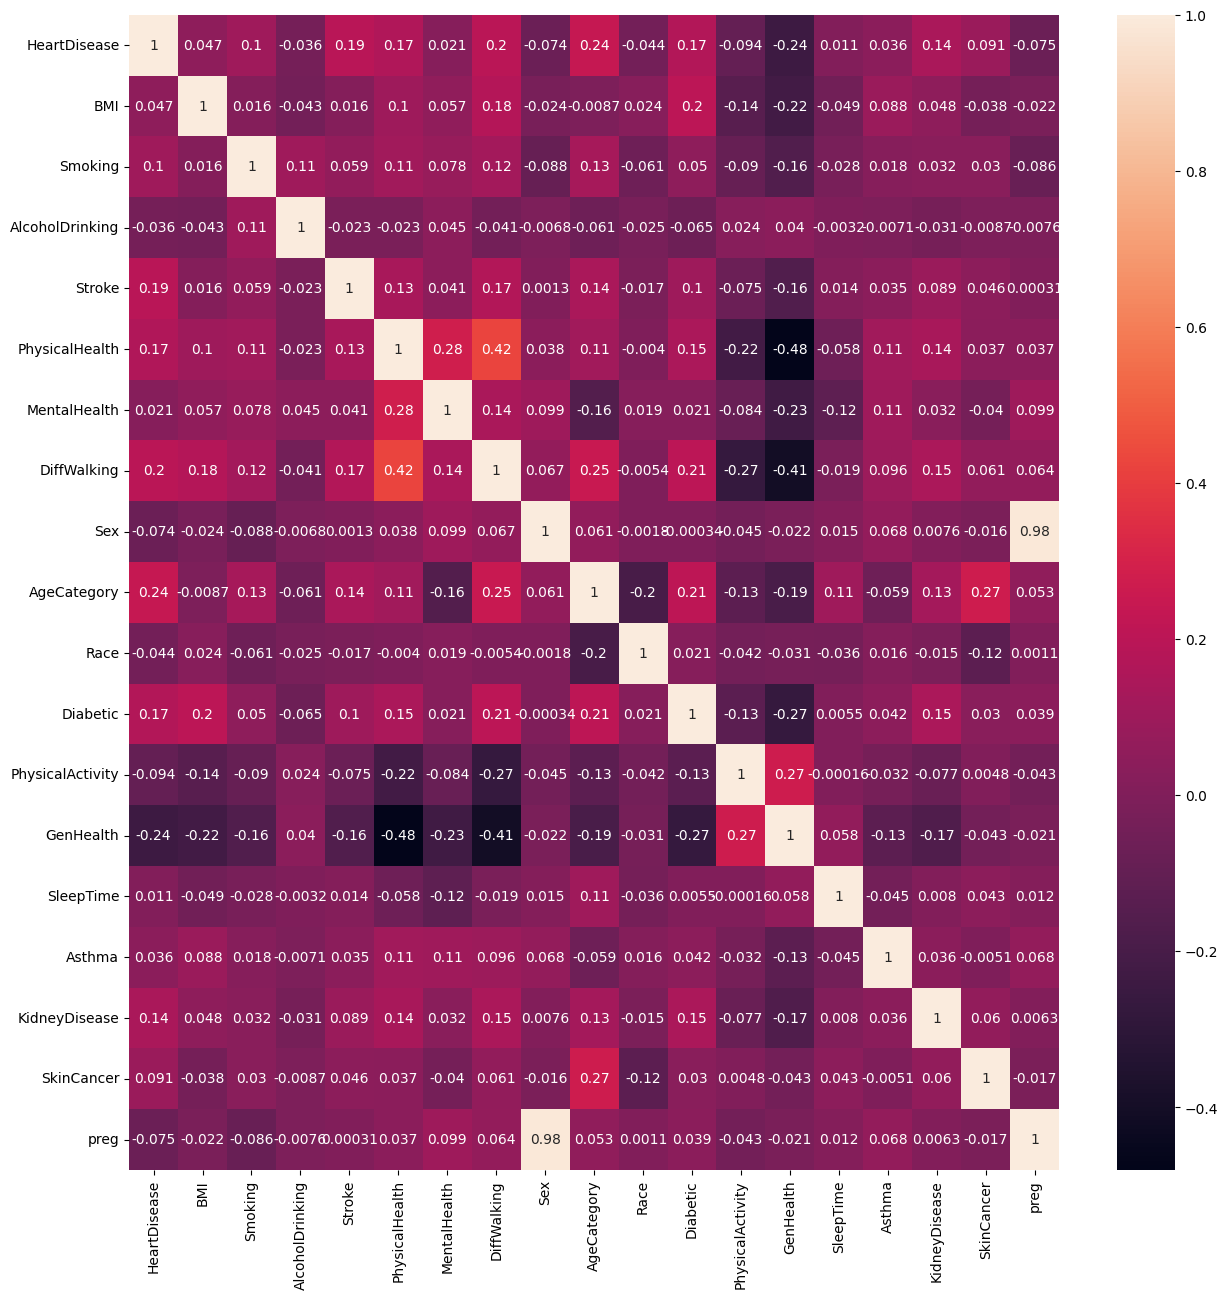

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

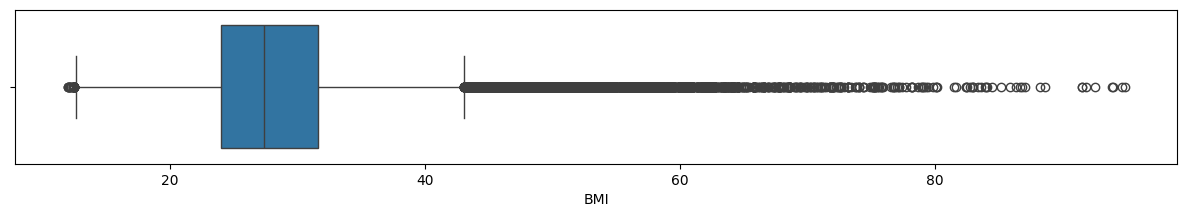

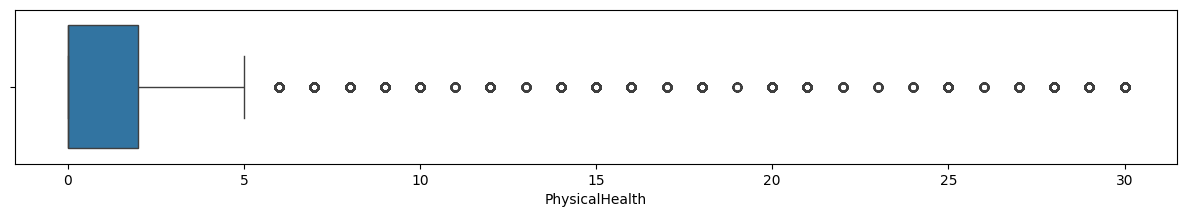

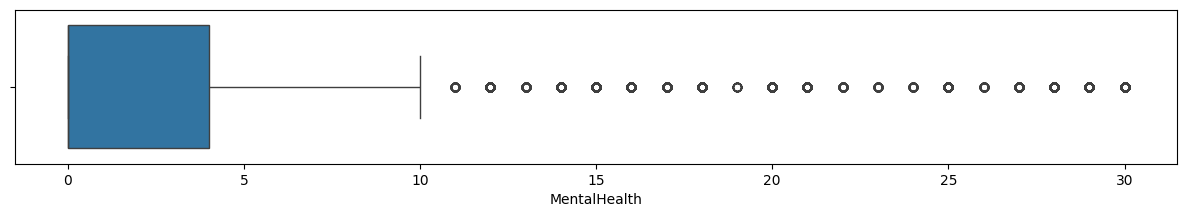

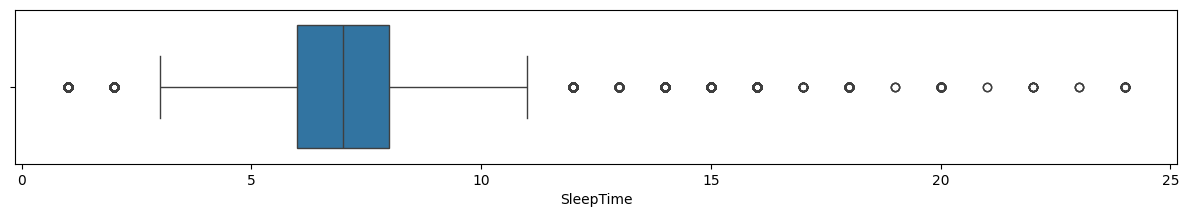

In [16]:
#outliers detection by boxplot
boxplot_outliers = []
features=['BMI','PhysicalHealth','MentalHealth','SleepTime']
for i in features:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low= Q1 - 1.5 * IQR
    up= Q3 + 1.5 * IQR
    boxplot_outliers.append(df[(df[i] < low) | (df[i] > up)])
    plt.figure(figsize=(15,2))
    sns.boxplot(data=df,x=i)
    plt.show()

In [17]:
boxplot_merged_outliers=pd.concat(boxplot_outliers).drop_duplicates()
boxplot_merged_outliers.shape

(79186, 19)

In [19]:
boxplot_merged_outliers.HeartDisease.value_counts()

HeartDisease
0    68129
1    11057
Name: count, dtype: int64

In [20]:
outlier_index_class0 = boxplot_merged_outliers[boxplot_merged_outliers['HeartDisease'] == 0].index
df_cleaned_1 = df.drop(index=outlier_index_class0)#removed 0.02 of class 0 which were outliers

In [21]:
features=['BMI','PhysicalHealth','MentalHealth','SleepTime']
for i in features:
    Q1 = df_cleaned_1[i].quantile(0.25)
    Q3 = df_cleaned_1[i].quantile(0.75)
    IQR = Q3 - Q1
    low= Q1 - 1.5 * IQR
    up= Q3 + 1.5 * IQR
    df_cleaned_1[i]=np.where(df_cleaned_1[i]<low,low,df_cleaned_1[i])
    df_cleaned_1[i]=np.where(df_cleaned_1[i]>up,up,df_cleaned_1[i])

In [22]:
x=df_cleaned_1.iloc[:,1:]
y=df_cleaned_1.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape

(186870, 18)

In [23]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [24]:
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)
print(np.unique(y_train_bal,return_counts=True))

(array([0, 1]), array([165061, 165061]))


In [25]:
sc=StandardScaler()
x_train_bal_sc=sc.fit_transform(x_train_bal)
x_test_sc=sc.transform(x_test)

In [26]:
lr_bal=LogisticRegression(random_state=42)
lr_bal.fit(x_train_bal_sc,y_train_bal)
y_prob_lr = lr_bal.predict_proba(x_test_sc)[:, 1] 
roc_auc_score(y_test,y_prob_lr)

np.float64(0.8392843862443324)

In [27]:
print(classification_report(y_test, lr_bal.predict(x_test_sc)))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     41266
           1       0.32      0.71      0.44      5452

    accuracy                           0.79     46718
   macro avg       0.64      0.76      0.66     46718
weighted avg       0.88      0.79      0.82     46718



In [28]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_bal,y_train_bal)
y_prob_dt = dt.predict_proba(x_test)[:, 1]
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     41266
           1       0.30      0.77      0.43      5452

    accuracy                           0.76     46718
   macro avg       0.63      0.77      0.64     46718
weighted avg       0.88      0.76      0.80     46718



In [29]:
rf=RandomForestClassifier(max_depth=5,random_state=42)
rf.fit(x_train_bal,y_train_bal)
y_prob_rf = rf.predict_proba(x_test)[:, 1]
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86     41266
           1       0.31      0.77      0.44      5452

    accuracy                           0.77     46718
   macro avg       0.64      0.77      0.65     46718
weighted avg       0.89      0.77      0.81     46718



In [30]:
score_dt=roc_auc_score(y_test,y_prob_dt)
score_rf=roc_auc_score(y_test,y_prob_rf)
print(score_dt,score_rf)

0.8424942597244744 0.8550629078122045


detecting outliers of numeric features by boxplot
merged the results (inner join), removed class 0 samples (light undersampling) and applied bounds for extra outliers

best results:
recall:76.8 dt........
roc_auc:85 rf........
f1:44 rf/lr.......
accuracy:79 lr